In [1]:
# Import required libraries and modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [2]:
# Load the Train dataset
train = pd.read_csv('train.csv')
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
# Load the Test dataset
test = pd.read_csv('test.csv')
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [4]:
# Combine Two Dataset - Train and Test Dataset
data = pd.concat([train, test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [7]:
data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [8]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

### Data Visualization

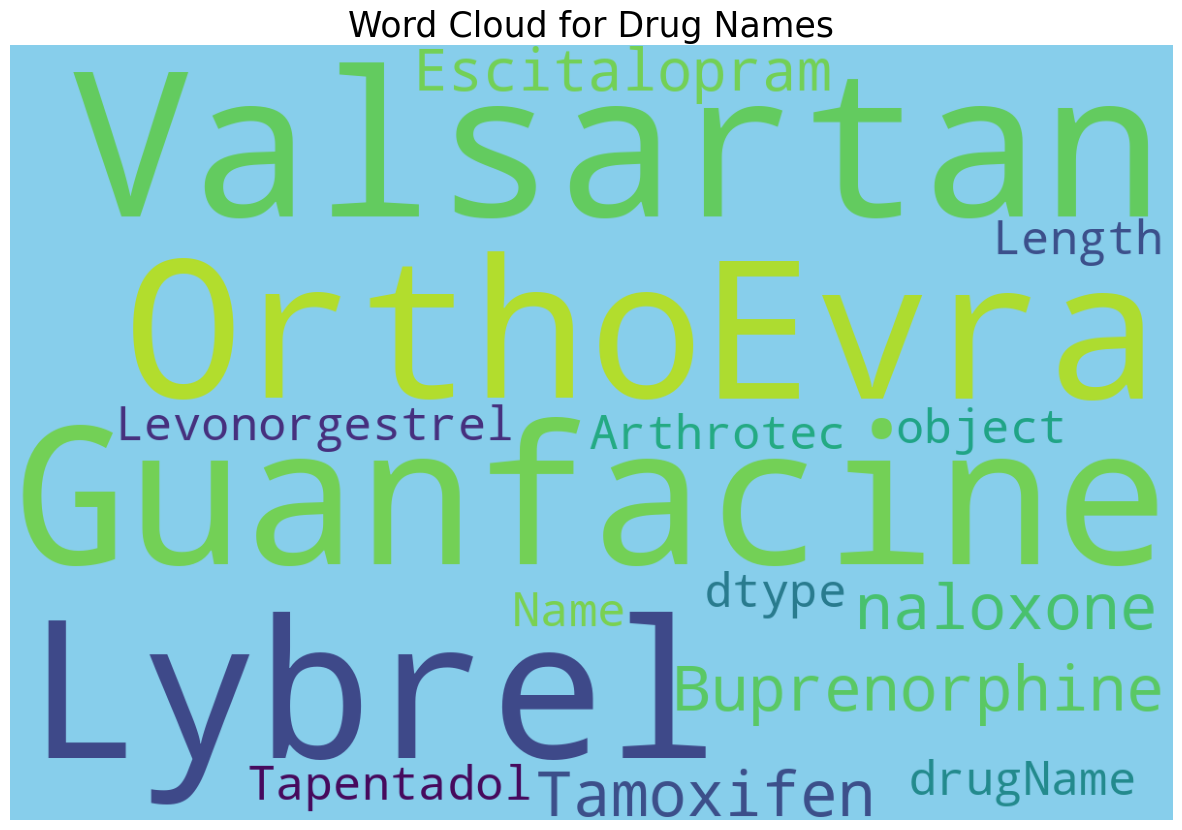

In [9]:
# Word Cloud for Drug Names
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'skyblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud for Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

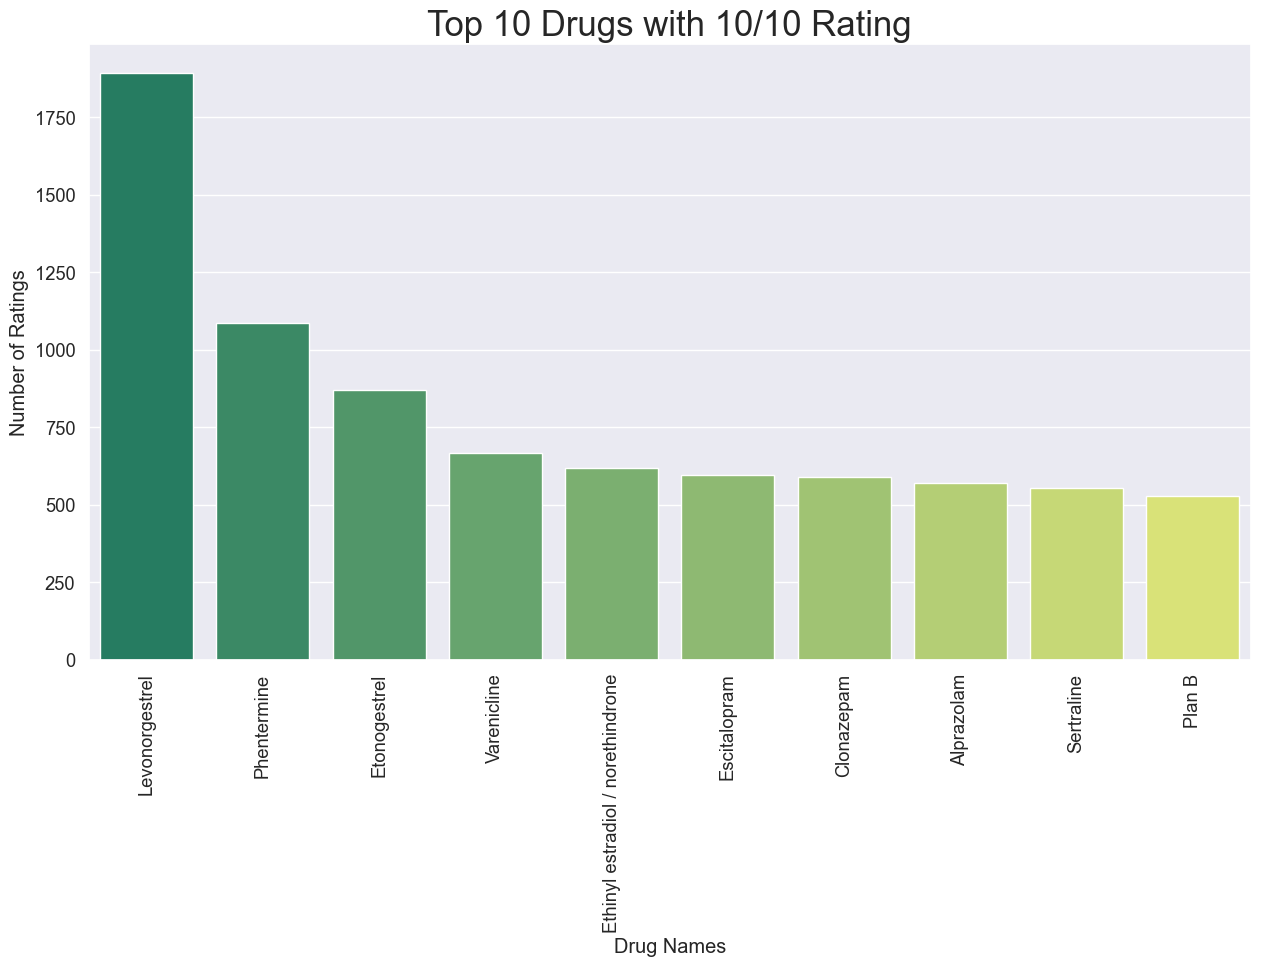

In [10]:
# Bar Plot for Top 10 Drugs with 10/10 Rating
sns.set(font_scale = 1.2, style  ='darkgrid')
plt.rcParams['figure.figsize'] = (15,8)

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugName = list(rating.keys())
drugRating = list(rating.values())
# print(drugName[0:10],drugRating[0:10])

sns_rating = sns.barplot(x = drugName[0:10], y = drugRating[0:10], palette = 'summer')
sns_rating.set_title("Top 10 Drugs with 10/10 Rating", fontsize = 25)
sns_rating.set_xlabel("Drug Names")
sns_rating.set_ylabel("Number of Ratings")
plt.setp(sns_rating.get_xticklabels(), rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

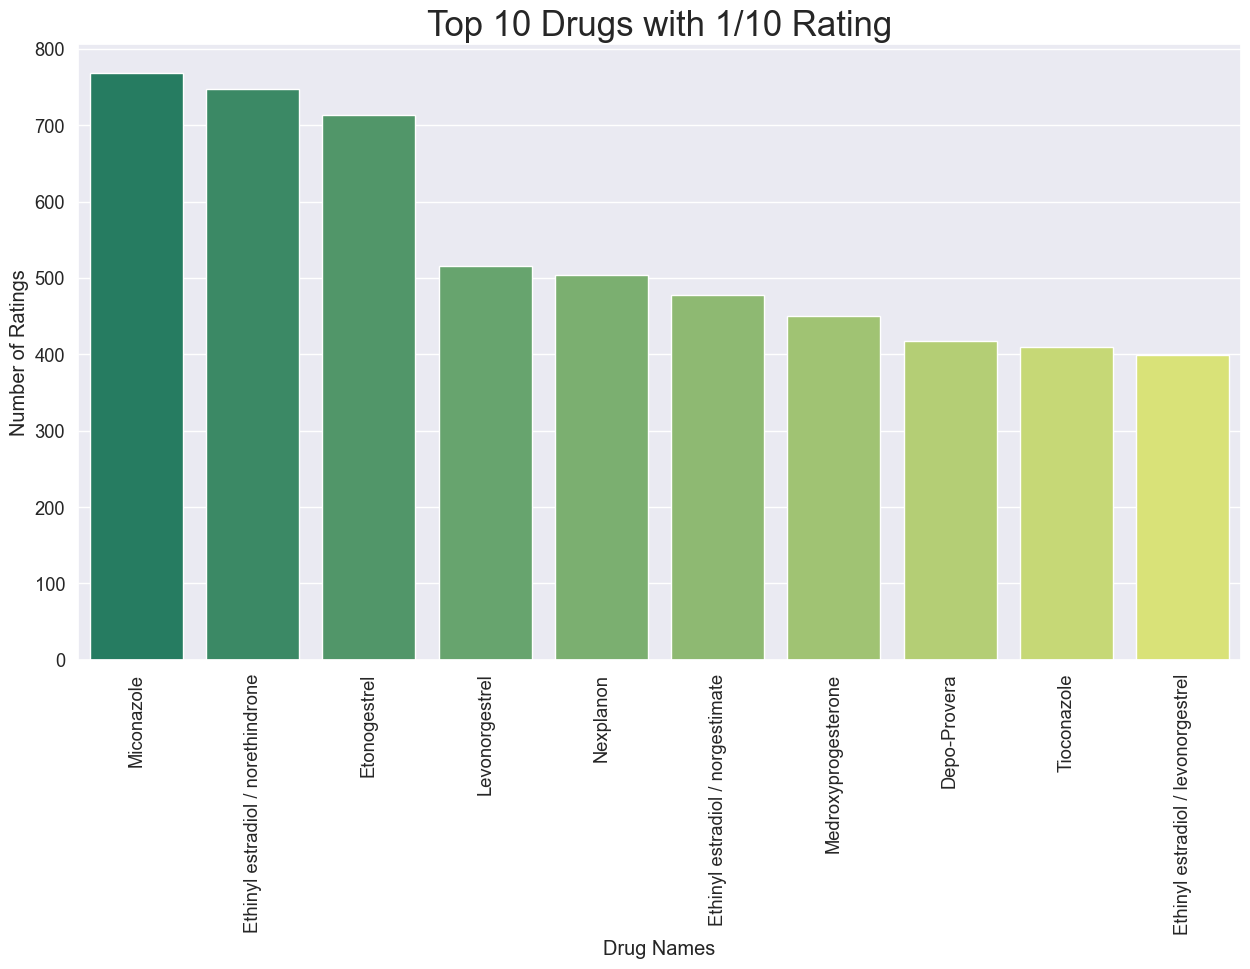

In [11]:
# Bar Plot for Top 10 Drugs with 1/10 Rating
sns.set(font_scale = 1.2, style  ='darkgrid')
plt.rcParams['figure.figsize'] = (15,8)

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugName = list(rating.keys())
drugRating = list(rating.values())
# print(drugName[0:10],drugRating[0:10])

sns_rating = sns.barplot(x = drugName[0:10], y = drugRating[0:10], palette = 'summer')
sns_rating.set_title("Top 10 Drugs with 1/10 Rating", fontsize = 25)
sns_rating.set_xlabel("Drug Names")
sns_rating.set_ylabel("Number of Ratings")
plt.setp(sns_rating.get_xticklabels(), rotation=90)

In [12]:
# data['rating'].value_counts()

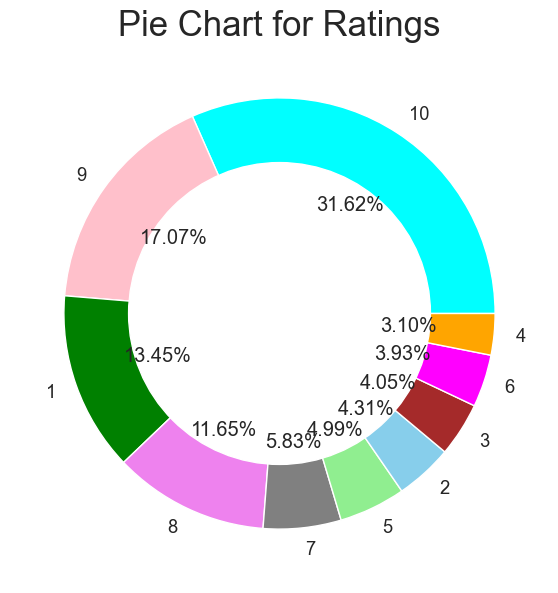

In [13]:
# Pie Chart for Ratings
rating_values_count = [68005, 36708, 28918, 25046, 12547, 10723, 9265, 8718, 8462, 6671]
colors = ['cyan', 'pink', 'green', 'violet', 'grey', 'lightgreen', 'skyblue', 'brown', 'magenta', 'orange']
rating_labels = "10", "9", "1", "8", "7", "5", "2", "3", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(rating_values_count, colors = colors, labels = rating_labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart for Ratings', fontsize = 25)
# p = plt.gcf()
plt.gca().add_artist(my_circle)
# plt.legend()
plt.show()

Text(0, 0.5, 'Count of Ratings')

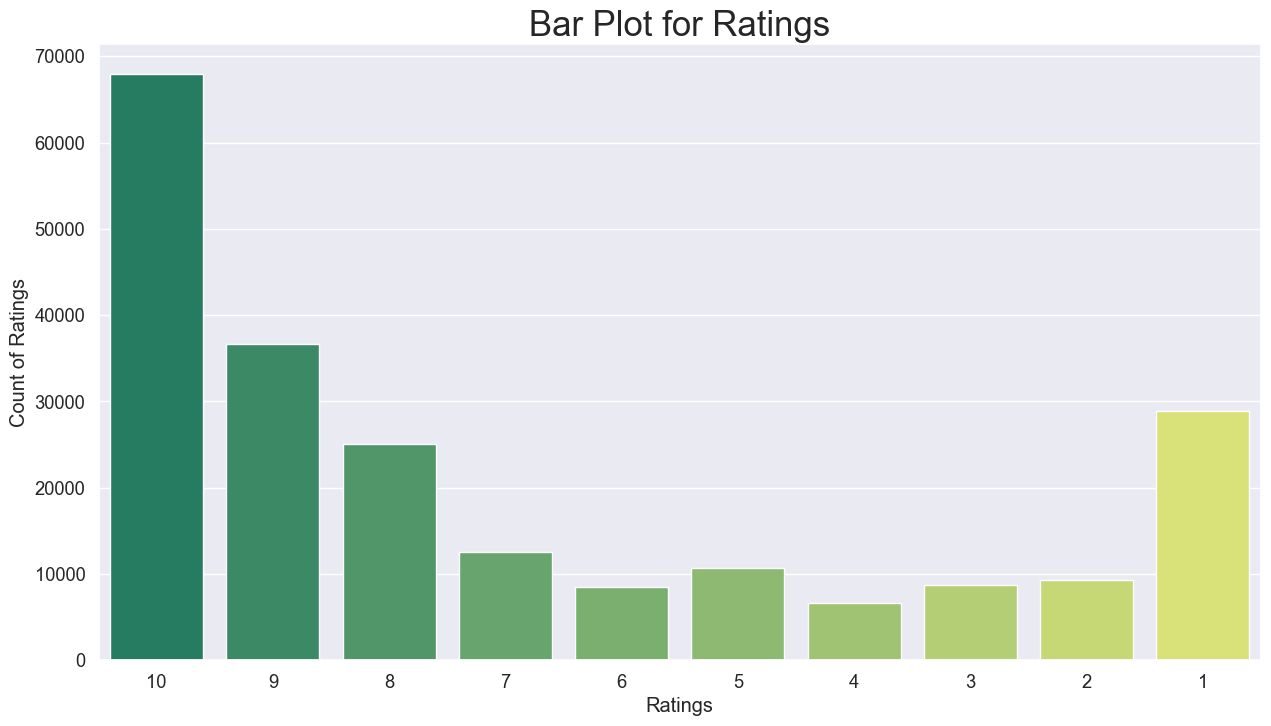

In [14]:
# Bar Plot for Ratings
sns.set(font_scale = 1.2, style  ='darkgrid')
plt.rcParams['figure.figsize'] = (15,8)

ratings = dict(data["rating"].value_counts())
rating = list(ratings.keys())
rating_count = list(ratings.values())

sns_rating = sns.barplot(x = rating[0:10], y = rating_count[0:10], palette = 'summer', order = list(range(10, 0, -1)))
sns_rating.set_title("Bar Plot for Ratings", fontsize = 25)
sns_rating.set_xlabel("Ratings")
sns_rating.set_ylabel("Count of Ratings")

In [15]:
# data['condition'].value_counts()[0:10]

Text(0, 0.5, 'Count of Conditions')

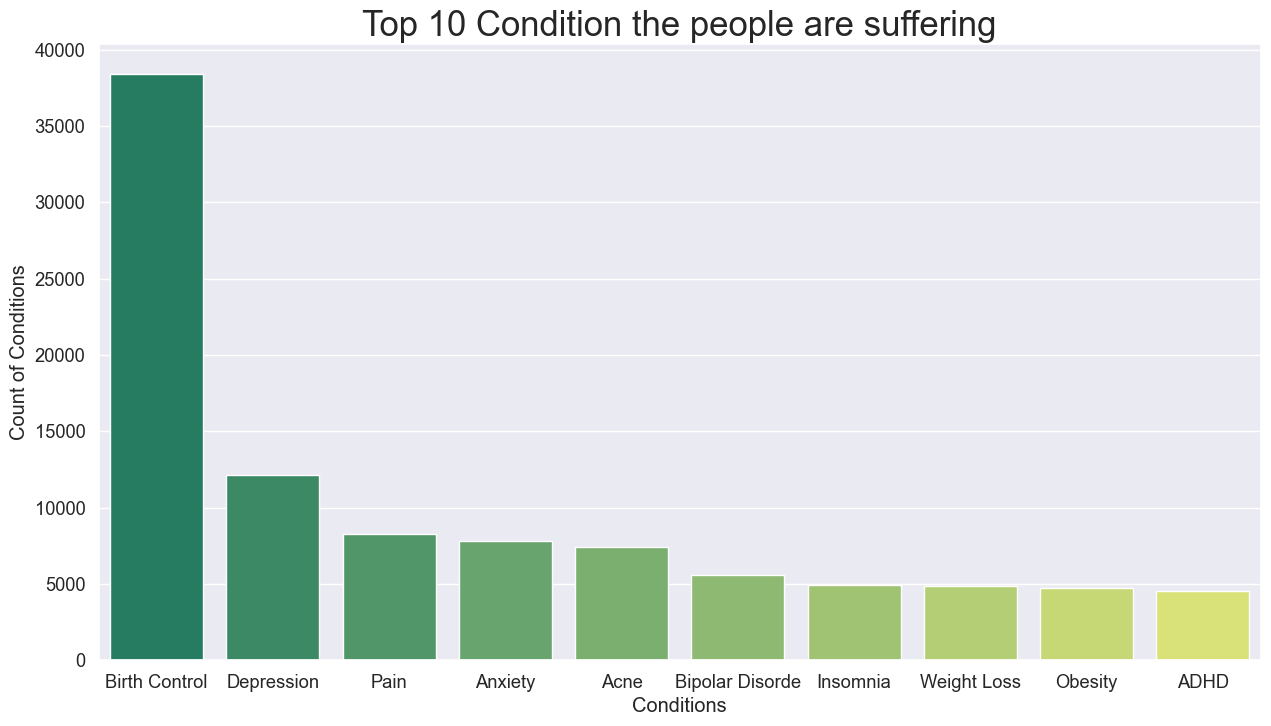

In [16]:
# Bar Plot for Top 10 Codition the people are suffering
sns.set(style = 'darkgrid', font_scale = 1.2)
plt.rcParams['figure.figsize'] = (15,8)

conditions = dict(data['condition'].value_counts())
condition = list(conditions.keys())
condition_count = list(conditions.values())

sns_condition = sns.barplot(x = condition[0:10], y = condition_count[0:10], palette = 'summer')
sns_condition.set_title("Top 10 Condition the people are suffering", fontsize = 25)
sns_condition.set_xlabel("Conditions")
sns_condition.set_ylabel("Count of Conditions")

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

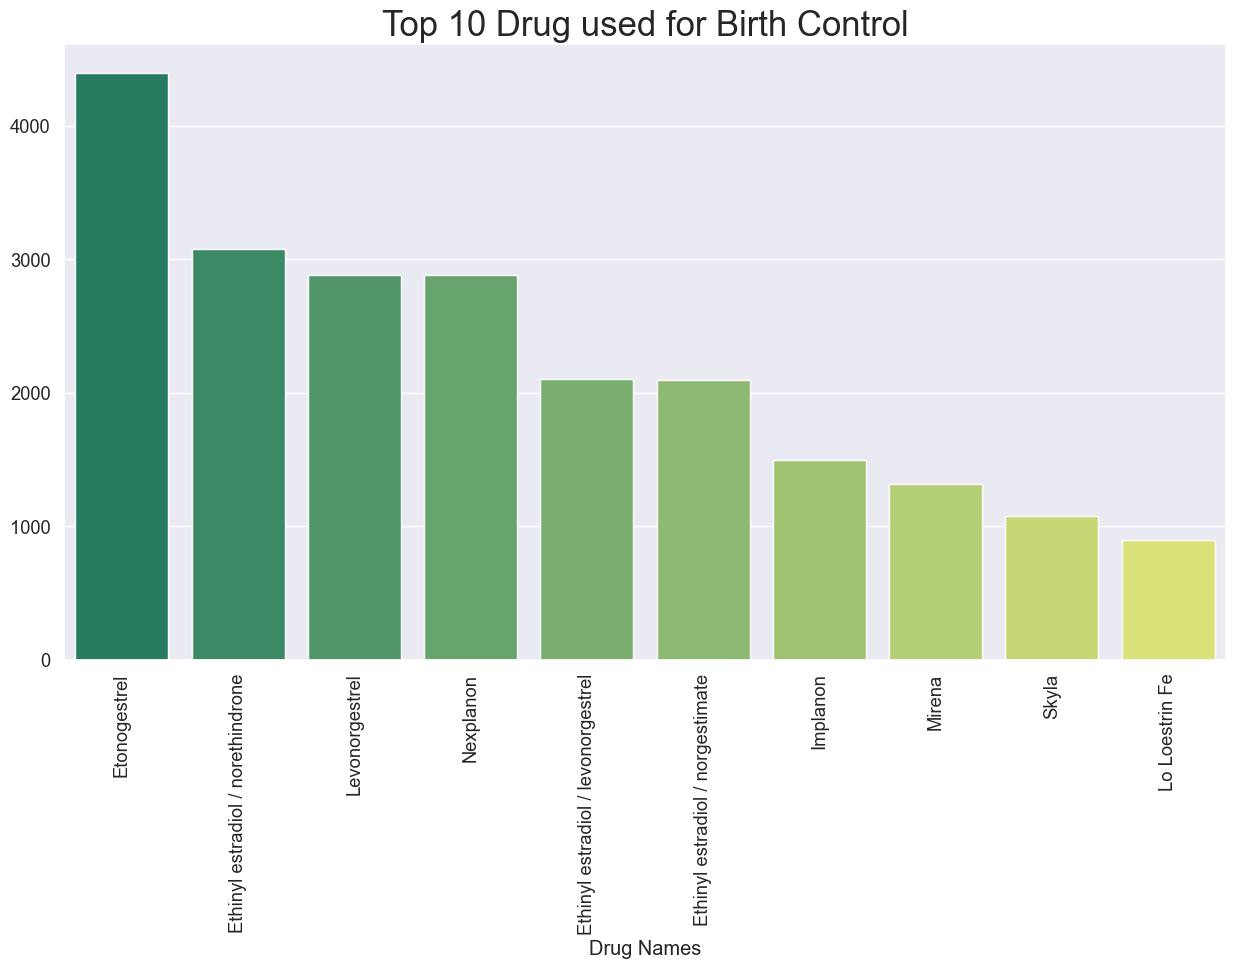

In [17]:
# Bar Plot for Top 10 Drug used for Birth Control
sns.set(style = 'darkgrid', font_scale = 1.2)
plt.rcParams['figure.figsize'] = (15,8)

drugs_for_birth_control_condition = dict(data[data['condition'] == 'Birth Control']['drugName'].value_counts())
drugName = list(drugs_for_birth_control_condition.keys())
drug_count = list(drugs_for_birth_control_condition.values())
# print(drugName[0:10],drug_count[0:10])

sns_drugs_for_birth_control = sns.barplot(x = drugName[0:10], y = drug_count[0:10], palette = 'summer')
sns_drugs_for_birth_control.set_title("Top 10 Drug used for Birth Control", fontsize = 25)
sns_drugs_for_birth_control.set_xlabel("Drug Names")
plt.setp(sns_drugs_for_birth_control.get_xticklabels(), rotation = 90)

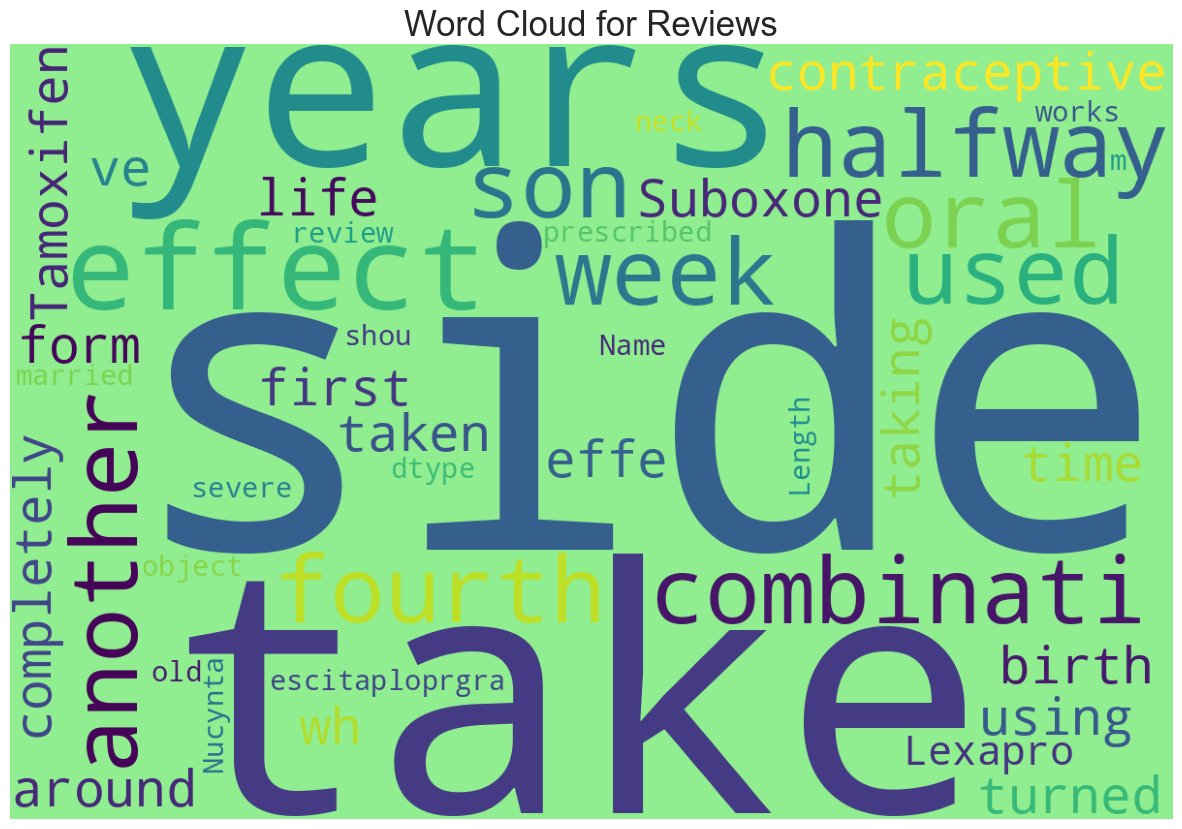

In [18]:
# Word Cloud for Reviews
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud for Reviews', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [19]:
# Creating a new column Review_Sentiment
data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

Review_Sentiment
1.0    161491
0.0     53572
Name: count, dtype: int64

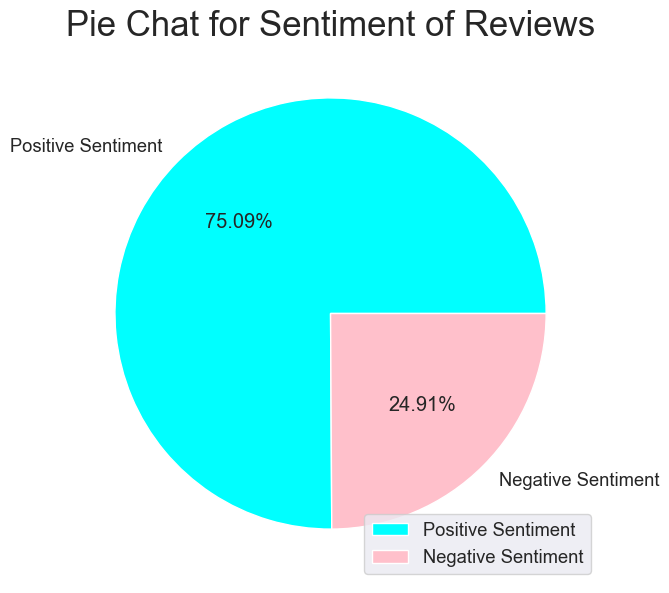

In [20]:
# Pie Chat for Sentiment of Reviews
size = [161491, 53572]
colors = ['cyan', 'pink']
labels = "Positive Sentiment", "Negative Sentiment"
explode = [0, 0]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chat for Sentiment of Reviews', fontsize = 25)
plt.legend()
plt.show()

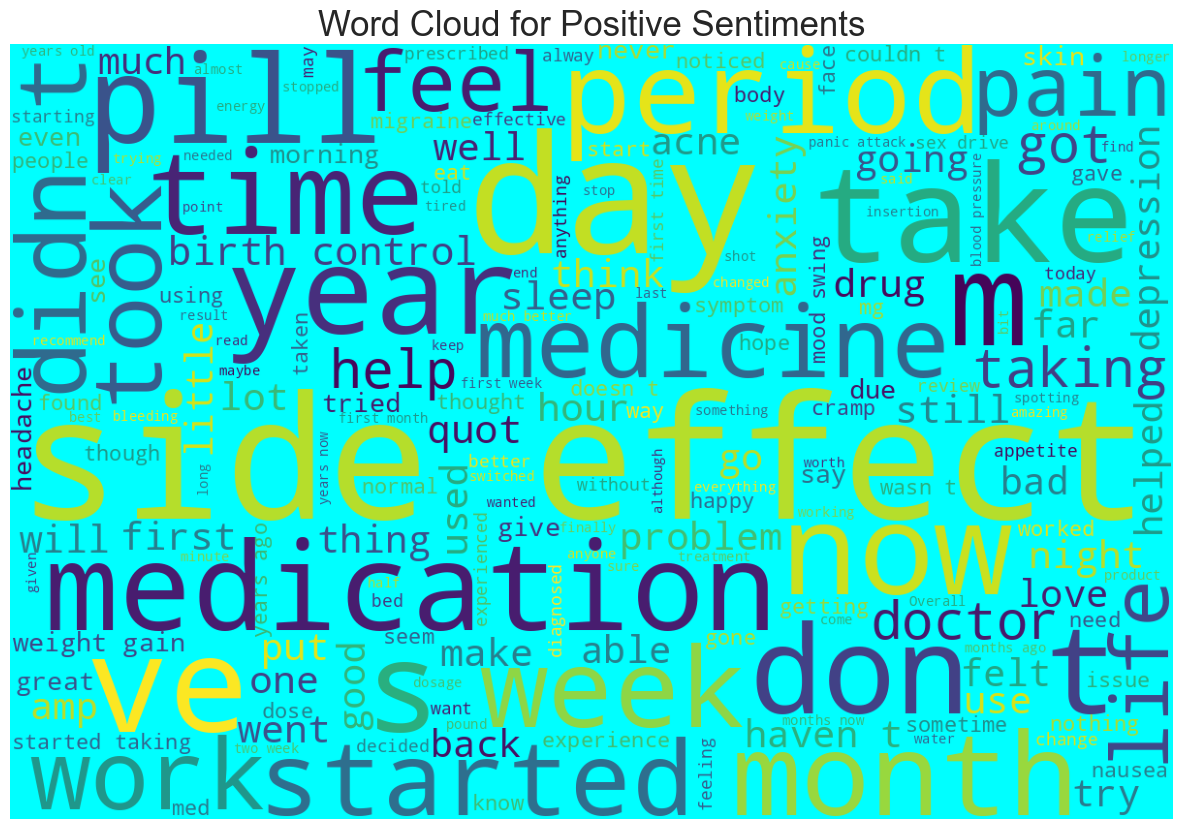

In [21]:
# Word Cloud for Positive Sentiments
from wordcloud import WordCloud
from wordcloud import STOPWORDS

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud for Positive Sentiments', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

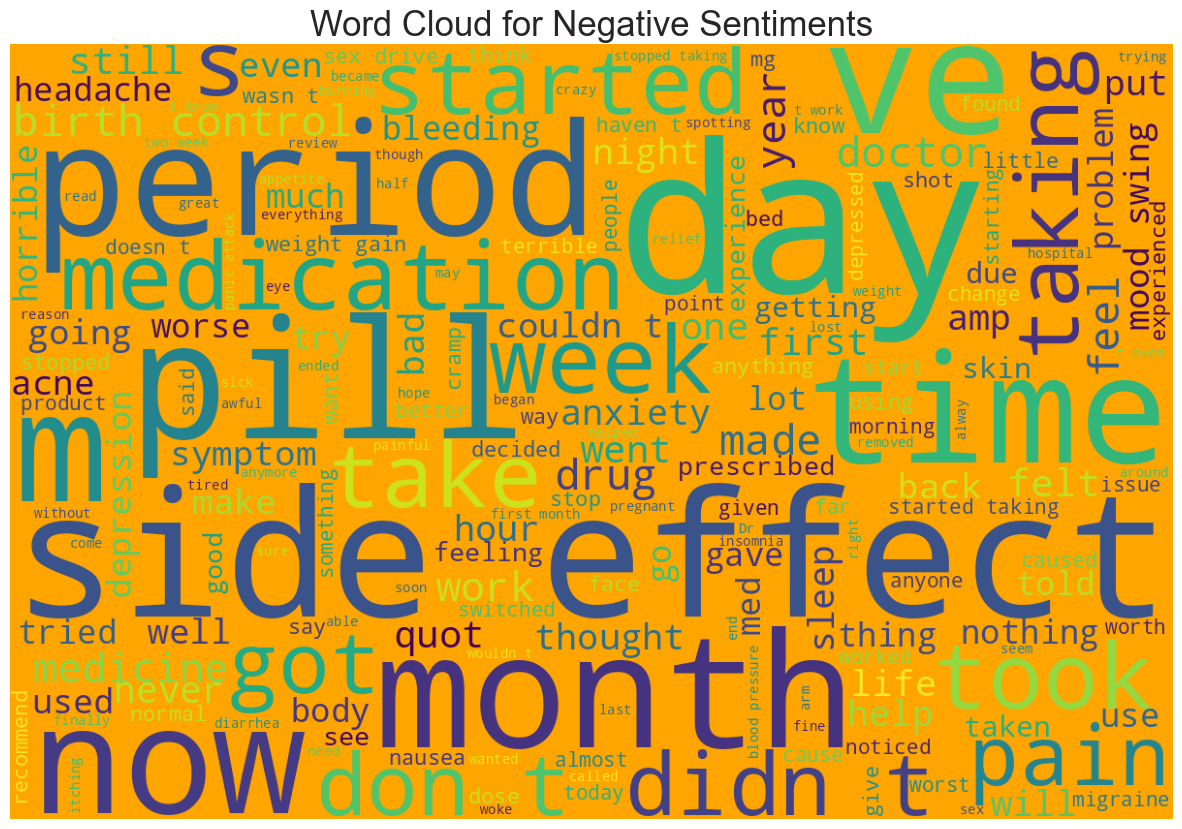

In [22]:
# Word Cloud for Negative Sentiments
from wordcloud import WordCloud
from wordcloud import STOPWORDS

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud for Negative Sentiments', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [23]:
# Converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# Extracting year, month, date from date
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day

Text(0, 0.5, 'Count of Reviews')

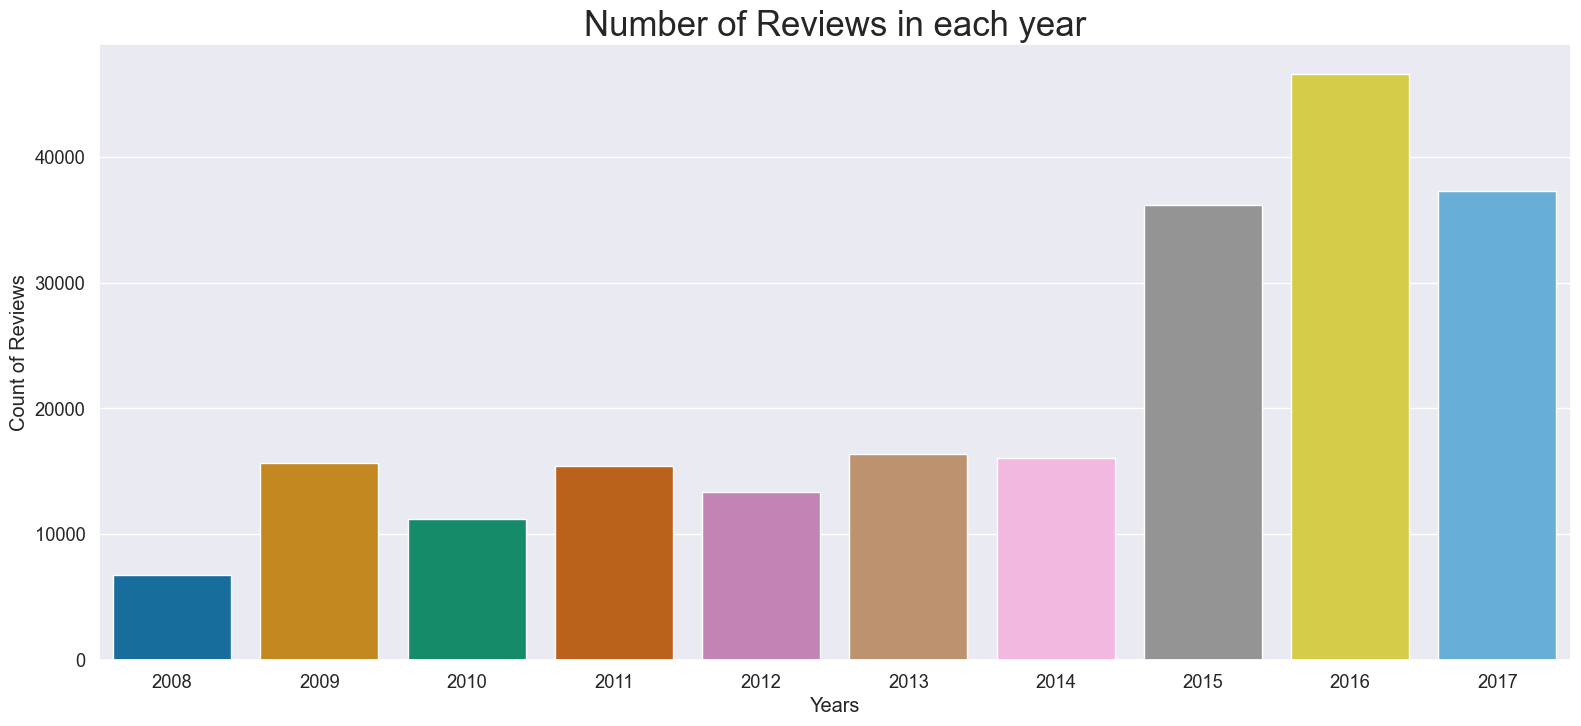

In [24]:
# Bar Plot for Number of Reviews in each year
sns.set(font_scale = 1.2, style  ='darkgrid')
plt.rcParams['figure.figsize'] = (19,8)

reviews = dict(data["Year"].value_counts())
years = list(reviews.keys())
countReviews = list(reviews.values())
# print(years,countReviews)

sns_reviews = sns.barplot(x = years, y = countReviews, palette = 'colorblind')
sns_reviews.set_title("Number of Reviews in each year", fontsize = 25)
sns_reviews.set_xlabel("Years")
sns_reviews.set_ylabel("Count of Reviews")

Text(0, 0.5, 'Count of Reviews')

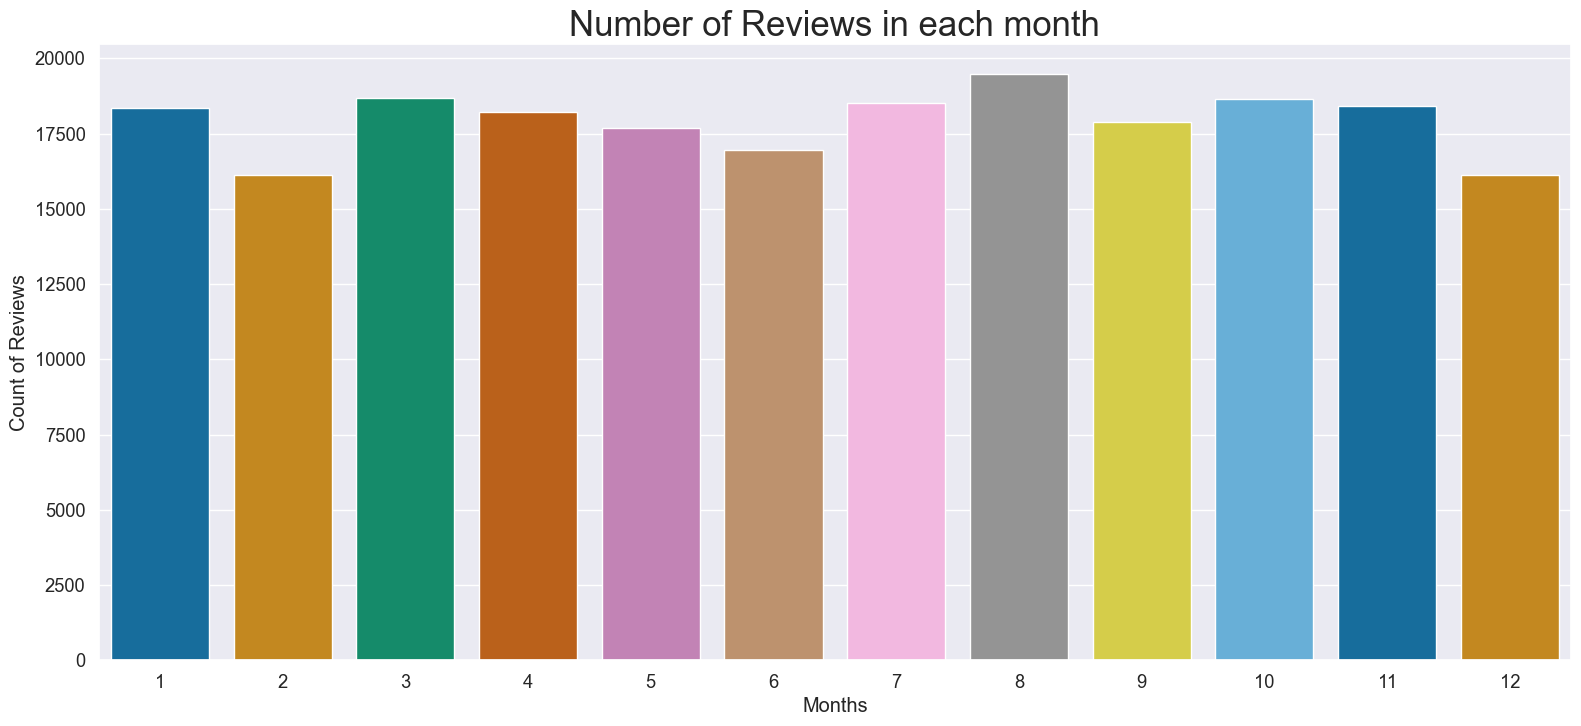

In [25]:
# Bar Plot for Number of Reviews in each month
sns.set(font_scale = 1.2, style  ='darkgrid')
plt.rcParams['figure.figsize'] = (19,8)

reviews = dict(data["Month"].value_counts())
months = list(reviews.keys())
countReviews = list(reviews.values())
# print(months,countReviews)

sns_reviews = sns.barplot(x = months, y = countReviews, palette = 'colorblind')
sns_reviews.set_title("Number of Reviews in each month", fontsize = 25)
sns_reviews.set_xlabel("Months")
sns_reviews.set_ylabel("Count of Reviews")

Text(0, 0.5, 'Count of Reviews')

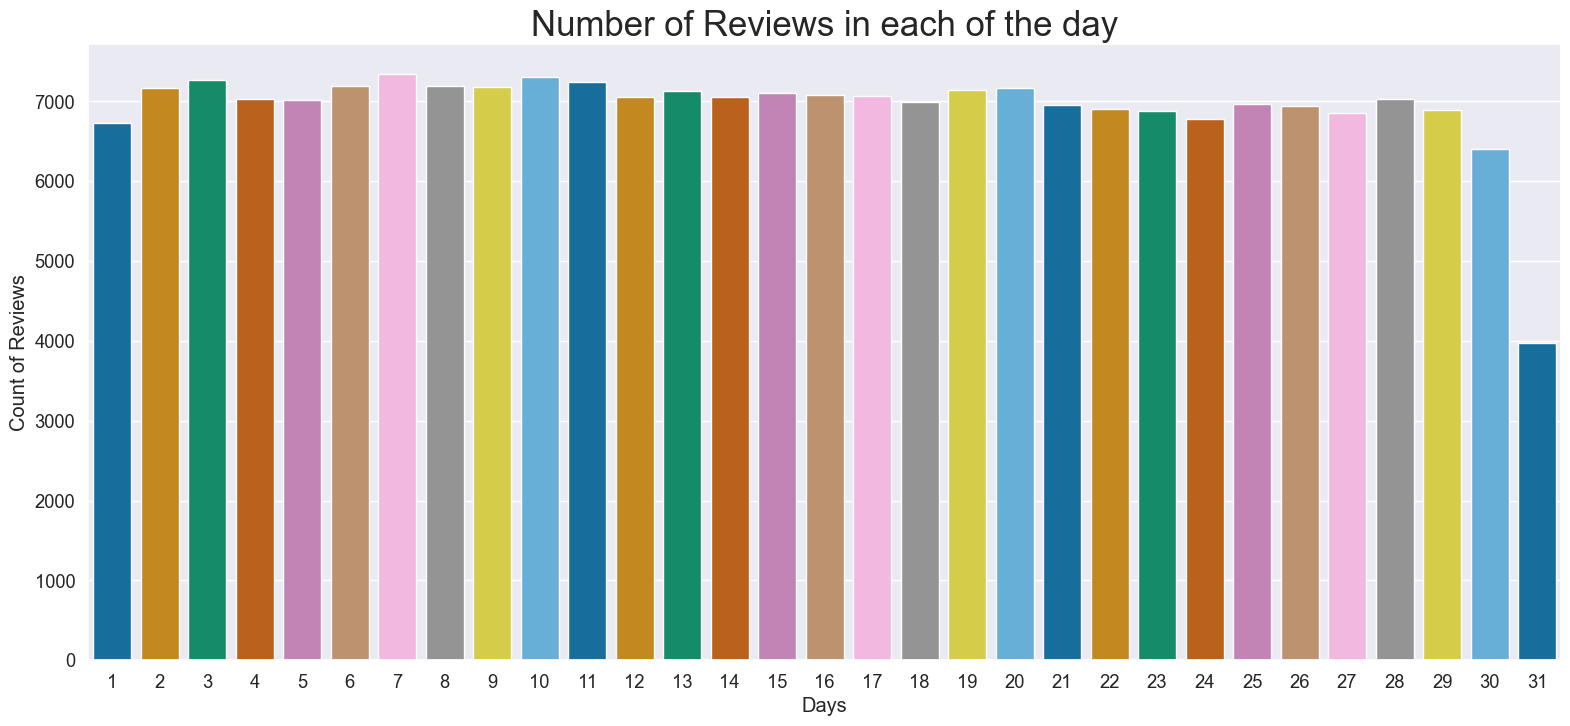

In [26]:
# Bar Plot for Number of Reviews in each of the day
sns.set(font_scale = 1.2, style  ='darkgrid')
plt.rcParams['figure.figsize'] = (19,8)

reviews = dict(data["Day"].value_counts())
days = list(reviews.keys())
countReviews = list(reviews.values())
# print(days,countReviews)

sns_reviews = sns.barplot(x = days, y = countReviews, palette = 'colorblind')
sns_reviews.set_title("Number of Reviews in each of the day", fontsize = 25)
sns_reviews.set_xlabel("Days")
sns_reviews.set_ylabel("Count of Reviews")

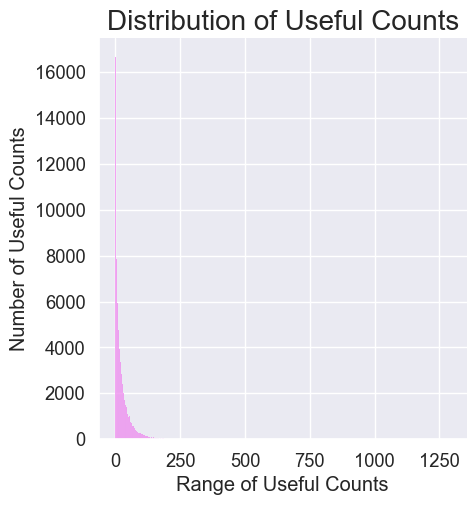

In [27]:
# Distribution of Useful Counts
plt.rcParams['figure.figsize'] = (19, 8)
sns.displot(data['usefulCount'], color = 'violet')
plt.title('Distribution of Useful Counts', fontsize = 20)
plt.xlabel('Range of Useful Counts')
plt.ylabel('Number of Useful Counts')
plt.show()

### Data Preprocessing

In [28]:
def review_clean(review):
    # Changing reviews to lower case
    to_lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    repeat_pattern_remove = to_lower.str.replace("&#039;", "")
    
    # Removing all special characters
    special_char_remove = repeat_pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all ASCII characters
    non_ascii_char_remove = special_char_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing whitespaces
    whitespace_remove = non_ascii_char_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple spaces with single space
    multiple_space_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing two or more dots with one
    dataframe = multiple_space_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [29]:
data['review_clean'] = review_clean(data['review'])
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,Month,Day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,"""it has no side effect, i take it in combinati..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,"""my son is halfway through his fourth week of ..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,"""i used to take another oral contraceptive, wh..."


In [30]:
# Contraction Dictionary for the expansion
import re
contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
    "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
    "doesn’t": "does not", "don't": "do not", "don’t": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
    "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
    "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
    "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not","might've": "might have",
    "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
    "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
    "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", 
    "shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "they'd": "they would",
    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
    "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
    "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y’all": "you all", "y'all'd": "you all would",
    "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have",
    "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", "ain’t": "am not", "aren’t": "are not",
    "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not", "couldn’t’ve": "could not have",
    "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
    "hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have",
    "he’s": "he is", "how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
    "i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would", "it’d’ve": "it would have",
    "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us", "ma’am": "madam", "mayn’t": "may not",
    "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
    "mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock",
    "oughtn’t": "ought not", "oughtn’t’ve": "ought not have", "shan’t": "shall not", "sha’n’t": "shall not", "shan’t’ve": "shall not have",
    "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will", "she’ll’ve": "she will have", "she’s": "she is",
    "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have", "so’ve": "so have", "so’s": "so is",
    "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would", "there’d’ve": "there would have",
    "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will", "they’ll’ve": "they will have",
    "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would", "we’d’ve": "we would have",
    "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
    "what’ll’ve": "what will have", "what’re": "what are", "what’s": "what is", "what’ve": "what have", "when’s": "when is",
    "when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will",
    "who’ll’ve": "who will have", "who’s": "who is", "who’ve": "who have","why’s": "why is", "why’ve": "why have", "will’ve": "will have",
    "won’t": "will not", "won’t’ve": "will not have", "would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have",
    "y’all": "you all", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have", "y’all’re": "you all are",
    "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
    "you’re": "you are", "you’re": "you are", "you’ve": "you have"
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function expand the contractions if there's any
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)


# Expanding the contractions
data['review_clean'] = data['review_clean'].apply(lambda x: expand_contractions(x))
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,Month,Day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,"""it has no side effect, i take it in combinati..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,"""my son is halfway through his fourth week of ..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,"""i used to take another oral contraceptive, wh..."


In [31]:
# Using Stopwords to extract the useful words in review_clean
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [32]:
# Removing the word stems using the Snowball Stemmer in review_clean
import nltk
from nltk.stem import SnowballStemmer

snow_ball_stemmer = SnowballStemmer(language = "english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(snow_ball_stemmer.stem(word) for word in x.split()))

In [33]:
# Sentiment polarity of all reviews
from textblob import TextBlob

def sentiment_polarity(review):
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [34]:
# Evaluating Sentiment Polarity for Uncleaned Reviews
data['sentiment'] = sentiment_polarity(data['review'])

# Evaluating Sentiment Polarity for Cleaned Reviews
data['sentiment_clean'] = sentiment_polarity(data['review_clean'])

In [35]:
# Cleaning the reviews without using Snowball Stemmer and Stopwords
data['review_clean_ss'] = review_clean(data['review'])

# Evaluating Sentiment Polarity for cleaned Reviews without using Snowball Stemmer and Stopwords
data['sentiment_clean_ss'] = sentiment_polarity(data['review_clean_ss'])
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,Month,Day,review_clean,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,"""it side effect, take combin bystol 5 mg fish ...",0.000000,0.000000,"""it has no side effect, i take it in combinati...",0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,"""mi son halfway fourth week intuniv. becam con...",0.168333,0.151923,"""my son is halfway through his fourth week of ...",0.168333
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,"""i use take anoth oral contraceptive, 21 pill ...",0.067210,0.080769,"""i used to take another oral contraceptive, wh...",0.067210


In [36]:
# Remove Missing Values
data = data.dropna(how="any", axis=0)

In [37]:
import string

# Words count in each review
data['words_count']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

# Unique words count in each review
data['unique_words_count']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

# Letters count in each review
data['letters_count']=data["review_clean_ss"].apply(lambda x: len(str(x)))

# Punctuations count in each review
data["punctuations_count"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Upper case words count in each review
data["uppercase_words_count"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# Title case words count in each review
data["titlecase_words_count"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

# Stopwords count in each review
data["stopwords_count"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

# Average length of the words in each review
data["average_word_length"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [38]:
data.columns
# data.head(3)

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'Year', 'Month', 'Day',
       'review_clean', 'sentiment', 'sentiment_clean', 'review_clean_ss',
       'sentiment_clean_ss', 'words_count', 'unique_words_count',
       'letters_count', 'punctuations_count', 'uppercase_words_count',
       'titlecase_words_count', 'stopwords_count', 'average_word_length'],
      dtype='object')

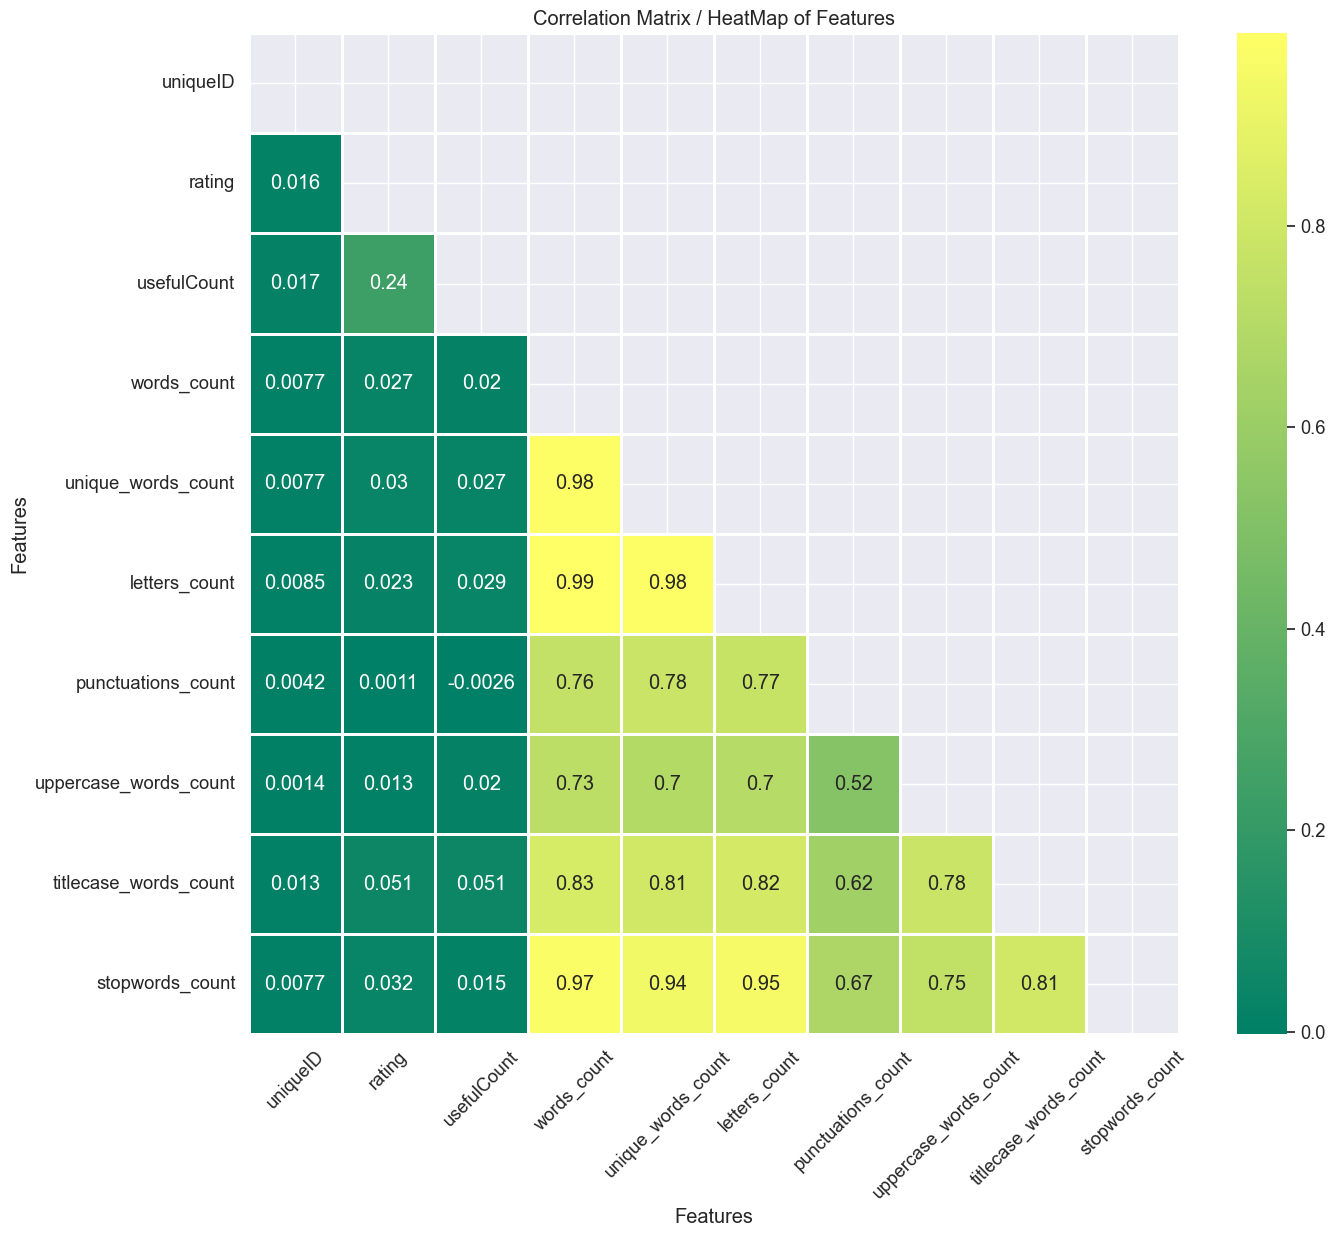

In [39]:
# Correlation Matrix / Heatmap of the features engineered
plt.rcParams['figure.figsize'] = (15,13)
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
matrix = np.triu(corr)
sns_ = sns.heatmap(corr, mask = matrix, annot = True, cmap = 'summer', linewidths = 1)
sns_.set(title="Correlation Matrix / HeatMap of Features", xlabel = "Features", ylabel = "Features")
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [40]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

### Define Features and Spliting Data

In [41]:
from sklearn.model_selection import train_test_split
X = data[['condition', 'usefulCount', 'Day', 'Month', 'Year', 'sentiment', 'sentiment_clean_ss', 
                'words_count', 'unique_words_count', 'letters_count','punctuations_count', 'uppercase_words_count',
                'titlecase_words_count', 'stopwords_count', 'average_word_length']]
y = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape)

(149708, 15) (64161, 15)


### Train the model with training data and make prediction

In [42]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

pred = model.predict(X_test)
print ("Accuracy: ", accuracy_score(y_test, pred))
print ("Confusion Matrix: \n")
confusion_matrix(y_test, pred)

Accuracy:  0.9004379607549757
Confusion Matrix: 



array([[11709,  4365],
       [ 2023, 46064]], dtype=int64)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

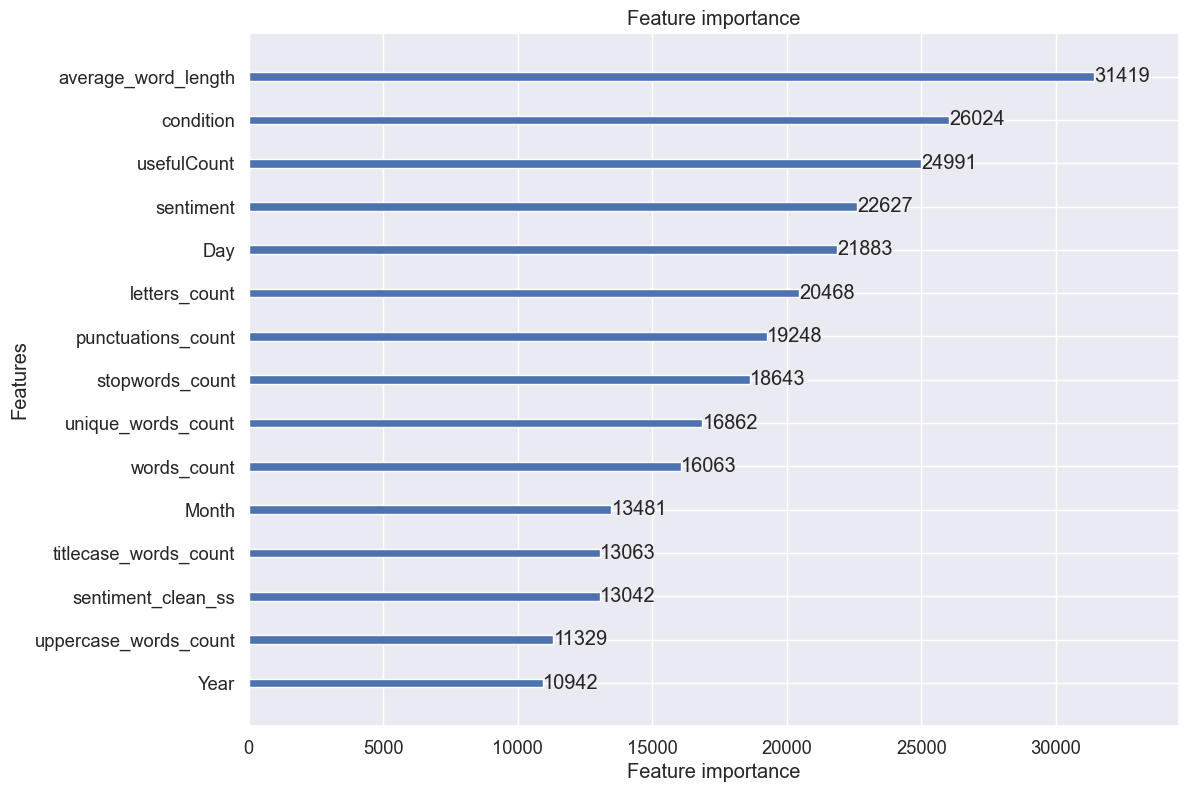

In [43]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = (12, 9)
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model)